In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing Dataset


In [ ]:
dataset = pd.read_csv('/content/CarPrice_Assignment.csv')
dataset['Brand'] = dataset['CarName'].apply(lambda x: x.split(' ')[0])

X = dataset.loc[:, ['enginesize','horsepower','aspiration','drivewheel','carbody','fueltype','doornumber','fuelsystem', 'Brand']].values
y = dataset.iloc[:, -2].values

In [ ]:
X[:,8]

array(['alfa-romero', 'alfa-romero', 'alfa-romero', 'audi', 'audi',
       'audi', 'audi', 'audi', 'audi', 'audi', 'bmw', 'bmw', 'bmw', 'bmw',
       'bmw', 'bmw', 'bmw', 'bmw', 'chevrolet', 'chevrolet', 'chevrolet',
       'dodge', 'dodge', 'dodge', 'dodge', 'dodge', 'dodge', 'dodge',
       'dodge', 'dodge', 'honda', 'honda', 'honda', 'honda', 'honda',
       'honda', 'honda', 'honda', 'honda', 'honda', 'honda', 'honda',
       'honda', 'isuzu', 'isuzu', 'isuzu', 'isuzu', 'jaguar', 'jaguar',
       'jaguar', 'maxda', 'maxda', 'mazda', 'mazda', 'mazda', 'mazda',
       'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda',
       'mazda', 'mazda', 'mazda', 'mazda', 'buick', 'buick', 'buick',
       'buick', 'buick', 'buick', 'buick', 'buick', 'mercury',
       'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi',
       'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi',
       'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi',
       'mitsubishi', 'Nissan', 'nissan

In [ ]:
brand = []

brand = dataset['Brand'].unique()

In [ ]:
brand

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [ ]:
# prompt: find the minimum fromdataset['enginesize']

# print("Enginesize", dataset['enginesize'].max())
# print("price", dataset['price'].max())


print(X)


[[130 111 'std' ... 'two' 'mpfi' 'alfa-romero']
 [130 111 'std' ... 'two' 'mpfi' 'alfa-romero']
 [152 154 'std' ... 'two' 'mpfi' 'alfa-romero']
 ...
 [173 134 'std' ... 'four' 'mpfi' 'volvo']
 [145 106 'turbo' ... 'four' 'idi' 'volvo']
 [141 114 'turbo' ... 'four' 'mpfi' 'volvo']]


## Encoding categorical data


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

categorical_features = [2, 3, 4, 5, 6, 7, 8]  # Indices of categorical columns

ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(sparse_output=False), categorical_features)],
    remainder='passthrough'
)

X = np.array(ct.fit_transform(X))

enginesize and horsepower

## Splitting into test and training set


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print(X_train)

[[1.0 0.0 0.0 ... 0.0 122 92]
 [0.0 1.0 0.0 ... 0.0 140 175]
 [0.0 1.0 0.0 ... 0.0 110 73]
 ...
 [1.0 0.0 0.0 ... 0.0 97 69]
 [1.0 0.0 0.0 ... 0.0 171 161]
 [1.0 0.0 0.0 ... 0.0 181 152]]


## Training the Multiple Linear Regression model on the Training set


In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting test results

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision= 3) # adjusting precision upto 3 decimal points

# reshaping the prediction values  and test y values and concatenating them into one array
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test),1)), 1))

[[29136.856 30760.   ]
 [22187.386 17859.167]
 [ 9522.266  9549.   ]
 [13985.431 11850.   ]
 [32321.041 28248.   ]
 [ 6394.226  7799.   ]
 [ 8668.006  7788.   ]
 [ 7225.438  9258.   ]
 [ 8175.112 10198.   ]
 [ 8688.365  7775.   ]
 [12571.124 13295.   ]
 [ 7171.95   8238.   ]
 [14049.4   18280.   ]
 [10492.242  9988.   ]
 [39842.399 40960.   ]
 [ 7203.582  6488.   ]
 [ 3442.624  5151.   ]
 [13599.899 12629.   ]
 [ 9069.295  8189.   ]
 [ 8125.428  9960.   ]
 [10665.992  8495.   ]
 [15736.007 13499.   ]
 [10060.237  8249.   ]
 [ 6037.574  6479.   ]
 [ 6191.725  6692.   ]
 [27960.798 41315.   ]
 [15901.969  9639.   ]
 [17130.196 13415.   ]
 [ 6911.818  7999.   ]
 [17080.512 12940.   ]
 [32271.356 25552.   ]
 [ 6901.291  6229.   ]
 [ 7430.828  7898.   ]
 [19798.981 21485.   ]
 [ 8322.796  7689.   ]
 [35469.46  28176.   ]
 [11380.191 11259.   ]
 [13645.    10945.   ]
 [ 7472.395  8916.5  ]
 [13599.899 14489.   ]
 [ 7396.142  7463.   ]
 [11918.498 18344.   ]
 [13040.213 15580.   ]
 [ 6545.116

In [ ]:
len(y_pred)

62

## Visualizing results

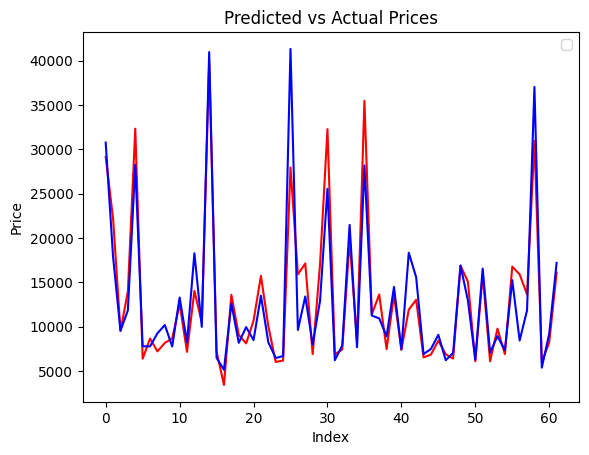

In [ ]:
plt.plot(y_pred, color = 'red')
plt.plot(y_test, 'blue')

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Predicted vs Actual Prices')
plt.legend()

# Display the plot
plt.show()


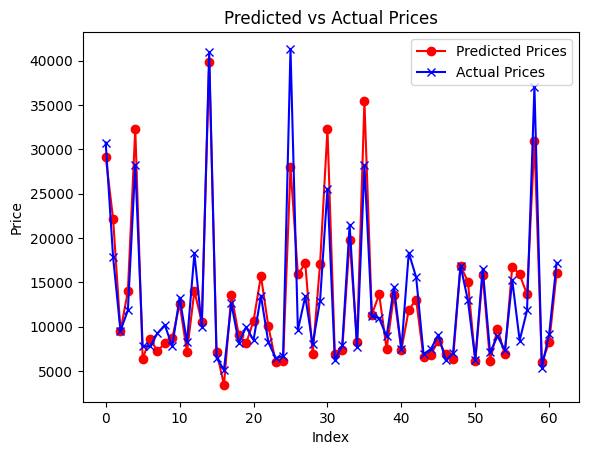

In [ ]:
# Plot the predicted prices as a red line
plt.plot(y_pred, color='red', label='Predicted Prices', linestyle='-', marker='o')

# Plot the actual prices as a blue line
plt.plot(y_test, color='blue', label='Actual Prices', linestyle='-', marker='x')

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Predicted vs Actual Prices')
plt.legend()

# Display the plot
plt.show()

In [ ]:
# Sort X_test and corresponding y_test and y_pred based on enginesize (first column of X_test)
sorted_indices = np.argsort(X_test[:, 0])
X_test_sorted = X_test[sorted_indices]
y_test_sorted = y_test[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# Plotting actual and predicted prices against enginesize
plt.plot(X_test_sorted[:, 0], y_test_sorted, color='blue', label='Actual Prices', linestyle='--')
plt.plot(X_test_sorted[:, 0], y_pred_sorted, color='red', label='Predicted Prices', linestyle='-')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices (Price vs Engine Size)')
plt.legend()
plt.show()